<a href="https://colab.research.google.com/github/Achraf-Trabelsi/PFA-NLP/blob/main/doc2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Doc2Vec As said, the goal of doc2vec is to create a numeric representation of a document, regardless of its length.**
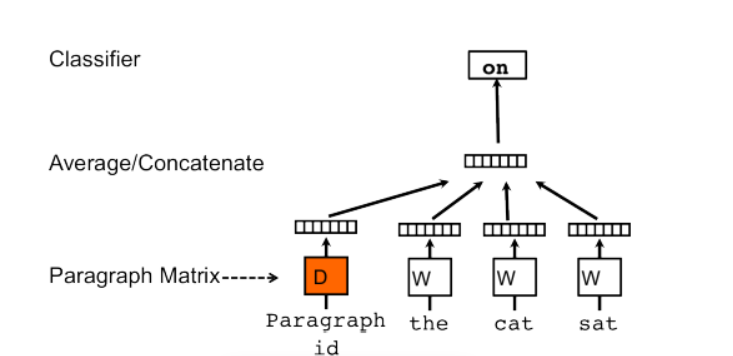

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
from nltk.corpus import stopwords
import regex as re
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
 

stop_words = stopwords.words('english')
other_words_to_take_out = ['school', 'students', 'people', 'would', 'could', 'many','coul','shoul','woul','stuent']
stop_words.extend(other_words_to_take_out)

porter = PorterStemmer()
lancaster=LancasterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(lancaster.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)


def lemSentence(l):
    lem_sent=[lemmatizer.lemmatize(i) for i in l]
    return(l)
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def preprocess(x):
  
    x=x.str.lower()
    x=x.apply(lambda x: re.sub('W*dw*','',x))
    x=x.apply(lambda x: remove_stopwords(x))
    x=x.apply(lambda x: x.split())
    return x

In [ ]:
X=df["discourse_text"]
y=df["discourse_type"]     

In [ ]:
labels=["Claim","Evidence","Position","Concluding Statement","Lead","Counterclaim","Rebuttal"]

y=df['discourse_type'].apply(labels.index)
y

0         4
1         2
2         1
3         1
4         0
         ..
144288    1
144289    1
144290    2
144291    1
144292    3
Name: discourse_type, Length: 144293, dtype: int64

In [ ]:
X_cleaned=preprocess(X)

In [ ]:
X_l=[i for i in X_cleaned]
y_l=[i for i in y]

In [ ]:
def tagged_document(list_of_list_of_words,list_of_tags):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [list_of_tags[i]])
data_for_training = list(tagged_document(X_l,y_l))
data_for_training[:1]

[TaggedDocument(words=['moern', 'humans', 'toay', 'always', 'phone.', 'always', 'phone', '5', 'hours', 'ay', 'stop', '.all', 'text', 'back', 'forwar', 'group', 'chats', 'social', 'meia.', 'even', 'riving.'], tags=[4])]

In [ ]:
labels=["Claim","Evidence","Position","Concluding Statement","Lead","Counterclaim","Rebuttal"]
#y = pd.get_dummies(df['discourse_type'])

In [ ]:
from gensim.models import Doc2Vec
from tqdm import tqdm

model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=10)
model.build_vocab(data_for_training)


In [ ]:
model.train(data_for_training, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
model.infer_vector(['moern', 'humans', 'toay', 'always', 'phone.', 'always', 'phone', '5', 'hours', 'ay', 'stop', '.all', 'text', 'back', 'forwar', 'group', 'chats', 'social', 'meia.', 'even', 'riving.'])

array([-0.10257562, -0.240692  ,  0.06123817, -0.06674215,  0.00934335,
        0.16939011, -0.01731622, -0.09412946,  0.3403158 ,  0.16228531,
        0.15967159,  0.13806187,  0.0090147 , -0.15943895, -0.22299203,
        0.22849922,  0.1073716 , -0.03786503, -0.22374186, -0.01301582,
       -0.18208043,  0.0957257 , -0.1686822 , -0.06931953, -0.20326495,
        0.09419829, -0.2980597 ,  0.12415485, -0.09963132, -0.15677726,
       -0.09452679, -0.09785683, -0.03639692, -0.11424202, -0.31943396,
       -0.26470333,  0.06235147, -0.05883254, -0.18804748,  0.21520439,
        0.17189516, -0.01269638,  0.06009756,  0.11091182,  0.01008622,
        0.1405741 ,  0.11694107, -0.0182596 , -0.06466097, -0.1408506 ,
        0.10773874,  0.06299273, -0.12185051, -0.02459558, -0.0097838 ,
        0.03712671, -0.12819894, -0.13919349, -0.257697  ,  0.02284343,
        0.0348807 , -0.00270555,  0.2511896 , -0.13963675, -0.04694101,
        0.33363166,  0.20047368, -0.07149823,  0.05692409,  0.09

In [ ]:
data_for_training

In [ ]:
 target,reg=zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in data_for_training])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reg,target, test_size=0.2, random_state=42,stratify=y )

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000,solver='newton-cg',penalty="l2")
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=labels))

In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
acc_per_class={}
for i in range(len(cm)):
  TP=cm[i,i]
  TN=cm.sum()-cm[i,:].sum()-cm[:,i].sum()
  ACC=(TP+TN)/cm.sum()
  acc_per_class[labels[i]]=ACC

In [ ]:
 acc_per_class

**MLP Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,LSTM
from keras.regularizers import l2
def create_deep_model(factor, rate):
    model = Sequential()  
   
    model.add(Dense(units=512,kernel_regularizer=l2(factor), 
      activation='relu')), Dropout(rate),
    model.add(Dense(units=256,kernel_regularizer=l2(factor),
      activation='relu')), Dropout(rate),
    model.add(Dense(units=128,kernel_regularizer=l2(factor),
      activation='relu')), Dropout(rate),
    
    #Output layer
    model.add(Dense(units=7, activation='softmax'))
    return model

In [ ]:
model=create_deep_model(0.001,0.25)
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['acc']) 

In [ ]:
d={i : reg[i] for i in range(len(reg))}

In [ ]:
d[1]

In [ ]:
df_dl=pd.DataFrame(data=d)

In [ ]:
df_dl=df_dl.T

In [ ]:
y_dl=pd.get_dummies(df['discourse_type'])


In [ ]:
from sklearn.model_selection import train_test_split

Xdl_train, Xdl_test, ydl_train, ydl_test = train_test_split(df_dl,y_dl, test_size=0.2, random_state=42,stratify=y )

In [ ]:
history=model.fit(x=Xdl_train, y=ydl_train, batch_size=256, epochs=10, validation_data=( Xdl_test, ydl_test), verbose=1)